# <center> Predicting Star Size | Linear Regression
---

<center> <img src = 'https://drive.google.com/uc?id=1Wr3rLlNCBU5qjr1s7o1l-O3DjgLDZIJi' width = 100%>

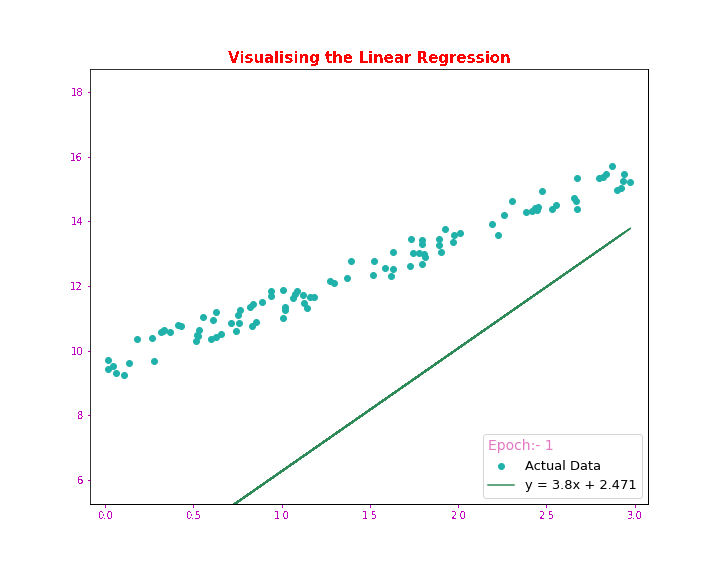
---

## <center> Linear Regression from Scratch

---
    


## Generating the Data for Linear Regression


In [1]:
# Importing Libraries (numpy and pyplot)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

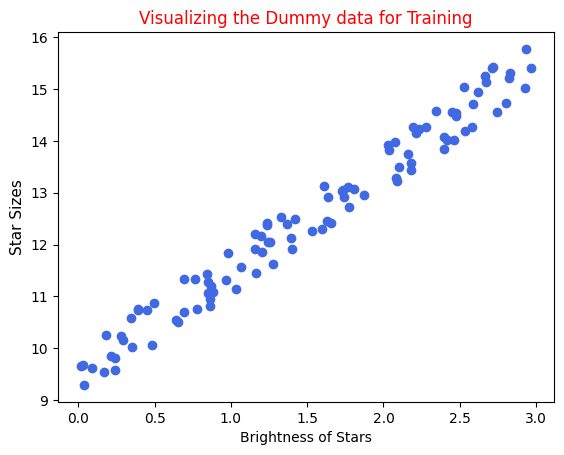

In [3]:
# Use seed value of 100 so that everyone gets the same output!


# Generating Randomized dataset --> X_train and y_train
'''
X_train = 3*random numbers between 0 and 1 of shape (100, 1) -> 100 dati con una sola feature (1 peso)
y_train = 9 + 2*X_train + noise, where noise is a random number between 0 and 1 and its shape is (100, 1)
The noise will allow to have some randomness in output instead of it simply being in a straight line

Our goal of this session is to train ML model --> Linear Regression to predict the values of 9 and 2 in y_train
In reality, we don't have y_train formula. Hence, we make ML model to predict what should be the formula!
'''
X_train = 3*np.random.rand(100,1)
y_train = 9 + 2*X_train + np.random.rand(100,1)

# Scatter plot --> Figsize is (8,6), Xlabel is brightness, ylabel is Size, add title
plt.scatter(X_train, y_train, color='royalblue')
plt.title('Visualizing the Dummy data for Training', color='red')
plt.xlabel('Brightness of Stars')
plt.ylabel('Star Sizes', fontsize=11, color='black')
plt.show()

In [6]:
# Print first 5 values in X_train and y_train
print(f'Here are the first 5 values in the X_train data:- ')
print(X_train[:5])

print(f'\nHere are the first 5 values in the y_train data:- ')
print(y_train[:5])



Here are the first 5 values in the X_train data:- 
[[1.77067209]
 [0.84668485]
 [2.09094275]
 [1.63622615]
 [2.67146095]]

Here are the first 5 values in the y_train data:- 
[[13.11848728]
 [11.27178463]
 [13.22497134]
 [12.91174163]
 [15.14256996]]


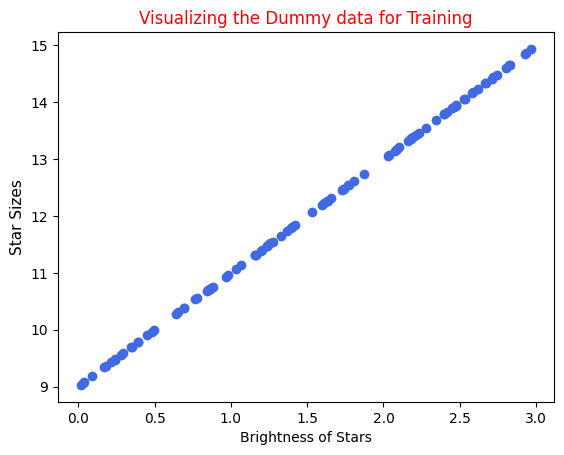

In [7]:
# Check what happens if you remove the noise! --> Remove noise from the y_train and plot again
y_train_2 = 9 + 2*X_train

# Scatter plot --> Figsize is (8,6), Xlabel is brightness, ylabel is Size, add title
plt.scatter(X_train, y_train_2, color='royalblue')
plt.title('Visualizing the Dummy data for Training', color='red')
plt.xlabel('Brightness of Stars')
plt.ylabel('Star Sizes', fontsize=11, color='black')
plt.show()

## Model Parameters and Hyperparameters

Remember that instead of using gradient and y-intercept, we will be using the actual model parameters for ML algorithms - Weight and Bias!

In [8]:
# Initialise the weight (W) and bias (b) to 0
W = 0
b = 0

# Hyperparameters --> Choose approproate learning_rate (0.01)
lr = 0.01

<img src = "https://drive.google.com/uc?id=1mFaXv4XF-_b-jyP_MK2vfgYfB2dVd4RZ">

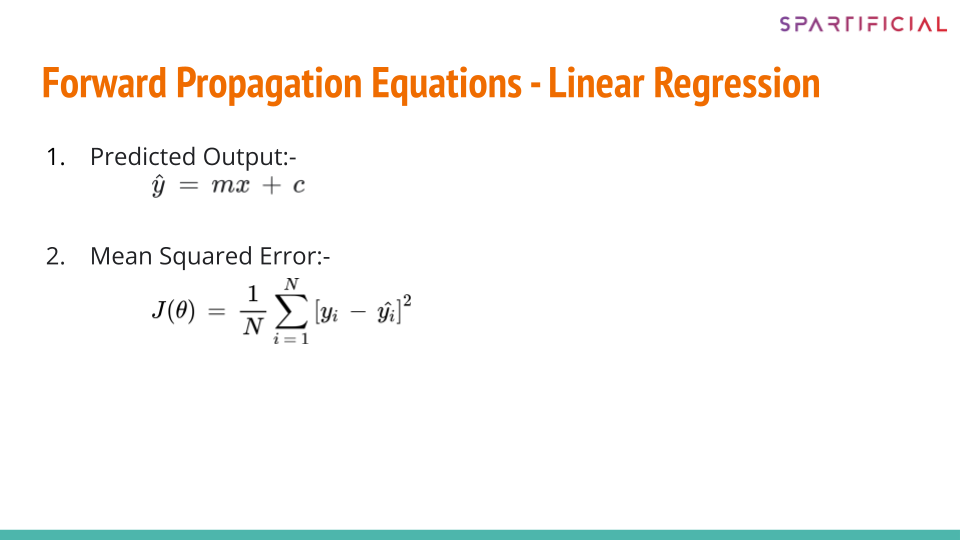

## Computing equations for the forward propagation

In [9]:
# Create a function for Predicted Output
def predict(X, W, b):
    '''
    X - Inputs
    W - Weight
    b - Bias

    Returns - Predicted output
    '''

    return X*W+b    

# MSE cost function
def cost_function(X, y, W, b):
    '''

    X - Inputs
    W - Weight
    b - Bias
    y - target values / true values

    Returns - MSE
    '''
    preds = predict(X, W, b)
    squared_diff = (preds - y)**2
    mse = squared_diff.mean()
    return mse 

In [10]:
# Check predict function
predict(X_train, W, b)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [11]:
cost_function(X_train,y_train,W,b)

np.float64(159.84485974435898)

<img src = 'https://drive.google.com/uc?id=1ZlXFrHr4ix4w2ND9e1QMZqaMuplh-PTh'>

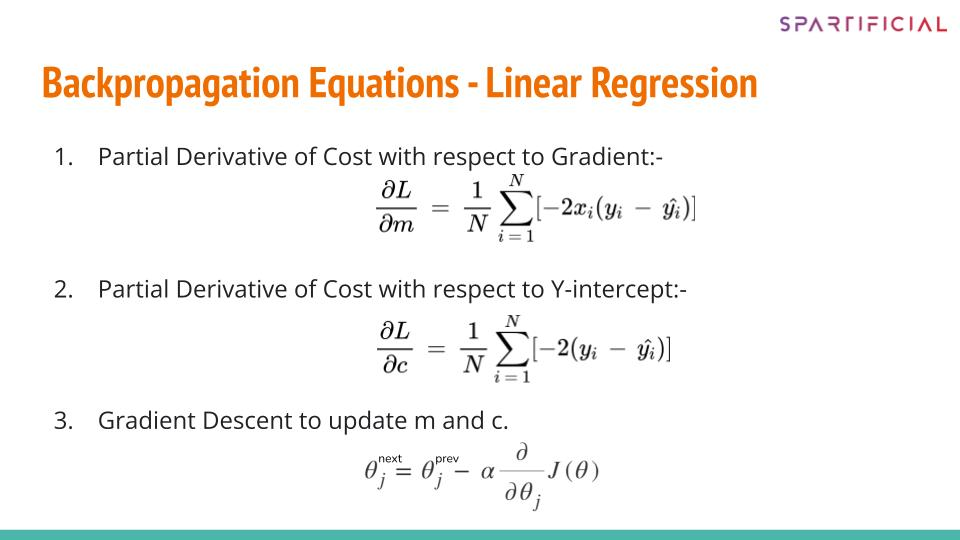

## Computing equations for the backpropagation


In [12]:
def update_weights(X, y, W, b, learning_rate):
    '''
    This function computes all the equations needed for the backpropagation in Linear Regression

    X - Full X array data (train/test)
    y - Full y array data (train/test)
    W - Weight value
    b - Bias value
    learning_rate - alpha value --> step size

    Returns - Updated values for W and b
    '''
    dJdW = np.mean(-2*X*(y-predict(X, W, b)))
    dJdb = np.mean(-2*(y-predict(X, W, b)))
    W = W - learning_rate*dJdW
    b = b - learning_rate*dJdb
    return W, b

In [13]:
# Epoch by epoch train the linear regression to get the best value for W and b
def train(X, y, W, b, learning_rate, tol=1e-5, verbose=False):
    '''
    X - Full X array data (train/test)
    y - Full y array data (train/test)
    W - Weight value
    b - Bias value
    learning_rate - alpha value --> step size
    tol - Threshold for when the training should stop based on convergence
    verbose - Display the training if it is set to True

    Returns -
    ---------
    weights - list of all the updated weight values in iterations (epochs)
    biases - list of all the updated bias values in the iterations
    costs - list of all the cost values based on W and b values in the iterations
    i - iteration count at the end of training
    '''

    # Lists of updated weights and biases and also the cost wrt these weights and biases
    weights = [W]
    biases = [b]
    costs = []

    # Initialize the counter
    i = 0

    '''
    This is the training loop:-
    0) Initialize the counter
    1) Get the cost value based on the current W and b
    2) Add this cost value to list of costs
    3) Break the training loop if the costs value are convergining
    4) If the loop is not stopped, Update the values of W and b
    5) Adding these values to the respective list of weights and biases
    6) Print the training progress after every 100 iterations
    7) Update the counter value by 1
    '''

    while True:
        cost = cost_function(X, y, W, b)
        costs.append(cost)

        # break loop if value and costs list have converged
        if i >= 1:
            if abs(costs[i] - costs[i-1]) < tol:
                break

        W, b = update_weights(X, y, W, b, learning_rate)

        # update W and b
        weights.append(W)
        biases.append(b)

        # print training history after every 100 iterations
        if verbose and (i+1) % 100 == 0:
            print(f'Epoch: {i}, W: {W}, b: {b}, cost: {cost}')

        i += 1

            
    return weights, biases, costs, i


In [14]:
# Train the linear regression model
weights, biases, costs, epochs = train(X_train, y_train, W, b, lr, verbose=True)

Epoch: 99, W: 4.376248178652753, b: 5.046950961766825, cost: 5.063233001340207
Epoch: 199, W: 3.6137299603496356, b: 6.479154722729085, cost: 2.3822224556163025
Epoch: 299, W: 3.0947545536047896, b: 7.450792224626781, cost: 1.1465212906731543
Epoch: 399, W: 2.742418965923794, b: 8.110441800397988, cost: 0.5769713501775295
Epoch: 499, W: 2.5032164798790175, b: 8.558281371042712, cost: 0.31445874282382275
Epoch: 599, W: 2.3408206524546253, b: 8.862322013892006, cost: 0.193463437373217
Epoch: 699, W: 2.2305692700341773, b: 9.068736807410904, cost: 0.13769520555888778
Epoch: 799, W: 2.155719025921357, b: 9.208872897718297, cost: 0.11199093820641409
Epoch: 899, W: 2.1049028010291972, b: 9.304012027389469, cost: 0.10014352367250552
Epoch: 999, W: 2.0704033983499204, b: 9.36860248352916, cost: 0.09468290387682979
Epoch: 1099, W: 2.0469815721959144, b: 9.412453284337964, cost: 0.09216603671838051


In [15]:
# Comparing initial and final values
initial = [weights[0], biases[0], costs[0]]
final = [weights[-1], biases[-1], costs[-1]]

df = pd.DataFrame(list(zip(initial,final)),
                  columns = ['Initial', 'Final'],
                  index = ['Weight', 'Bias', 'Cost'])
df

,Initial,Final
Weight,0.00000,2.035812
Bias,0.00000,9.433365
Cost,159.84486,0.091295


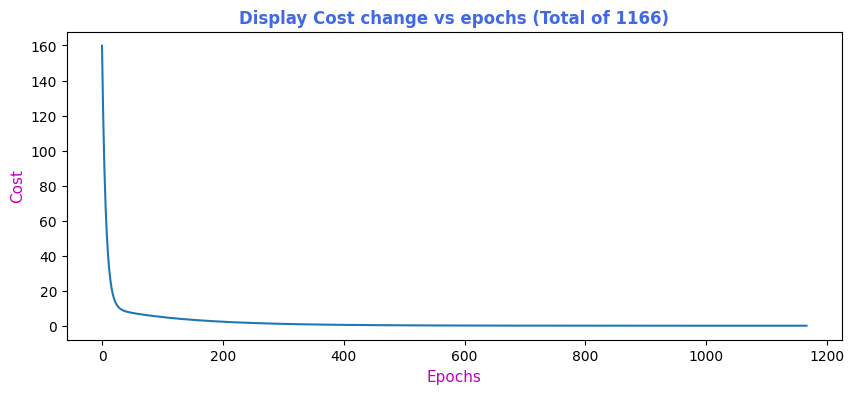

In [16]:
# Visualising the cost wrt epochs --> Figsize is (10,4), plot epochs on x, costs on y, add labels and title
plt.figure(figsize=(10,4))
plt.plot(costs)
plt.xlabel('Epochs', color='m', fontsize=11)
plt.ylabel('Cost', color='m', fontsize=11)
plt.title(f'Display Cost change vs epochs (Total of {epochs})', color='royalblue', weight='bold')
plt.show()

### Generate testing dataset and evaluate model

In [17]:
# Define a seed value (using different seed value compared to trianing set to avoid data leakage!) --> 5007
np.random.seed(5007)  # This number was choose to get the optimal results with random values

# Test data
X_test = 3*np.random.rand(10,1)
y_test = 9 + 2*X_test + np.random.rand(10,1)

prediction = predict(X_test, weights[-1], biases[-1])

# DataFrame to compare true and predicted outputs on test inputs
df1 = pd.DataFrame(list(zip(X_test.reshape(10,), y_test.reshape(10,), prediction.reshape(10,))),
                  columns = ['Test Input', 'True Output', 'Predicted Output'])
df1

,Test Input,True Output,Predicted Output
0,0.723836,10.889388,10.906960
1,1.900129,13.358554,13.301670
2,0.126943,9.974414,9.691797
3,2.026471,13.566160,13.558879
4,2.647429,14.842352,14.823033
5,1.238825,12.071978,11.955381
6,1.561243,12.881255,12.611762
7,2.042729,13.622504,13.591978
8,1.230220,12.098017,11.937862
9,0.382516,10.325675,10.212097


In [18]:
# Calculate the mean sqaured error to evaluate the performance
mse = np.mean((y_test - prediction)**2)
print(f'The MSE for the test data:- {round(mse, 5)} (5dp)')

The MSE for the test data:- 0.02095 (5dp)


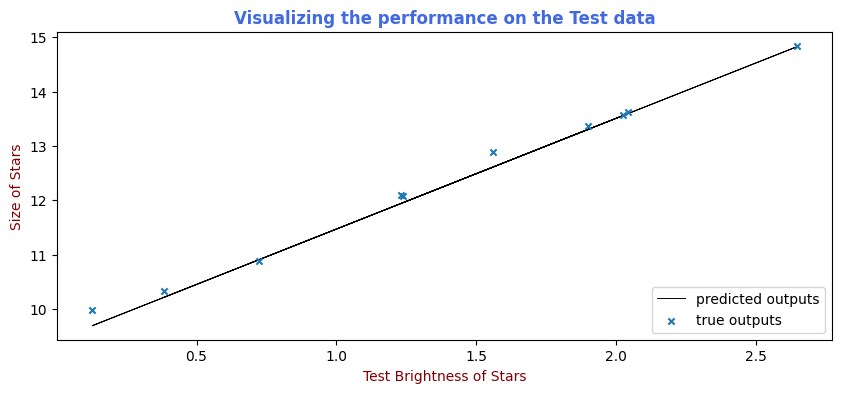

In [19]:
# Visualise the performance of the test data --> (10, 4) figsize, plot(X_test, prediction) and (X_test, y_test)
# Customize it

plt.figure(figsize=(10, 4))
plt.plot(X_test, prediction, label='predicted outputs', color='black', lw=0.7)
plt.scatter(X_test, y_test, label='true outputs', marker='x', zorder=2, s=20)
plt.xlabel('Test Brightness of Stars', color='maroon')
plt.ylabel('Size of Stars', color='maroon')
plt.title('Visualizing the performance on the Test data', color='royalblue', weight='bold')
plt.legend(loc='lower right')
plt.show()

---

# THE END